## Project Cardekho

#### Importing essential library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Nidhi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data Wrangling

In [2]:
df=pd.read_csv('cardekho.csv')

In [3]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [4]:
df.shape

(301, 9)

### Our task is to predict selling price

#### Data Exploration

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Checking for Null Values

In [13]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

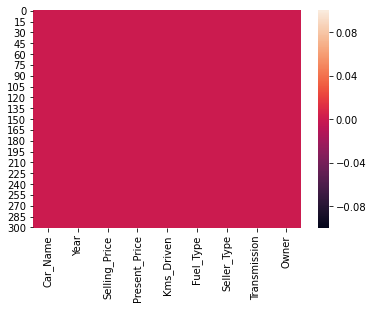

In [14]:
sns.heatmap(df.isnull()) # Checking for Null values

In [15]:
df.dtypes   ### Datatypes 

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

## exploration for object type datatype

In [16]:
print('Fuel_Type\n',df['Fuel_Type'].value_counts())
print('Seller_Type\n',df['Seller_Type'].value_counts())
print('Transmission\n',df['Transmission'].value_counts())

Fuel_Type
 Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Seller_Type
 Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Transmission
 Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [17]:
df['Selling_Price'].describe()

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

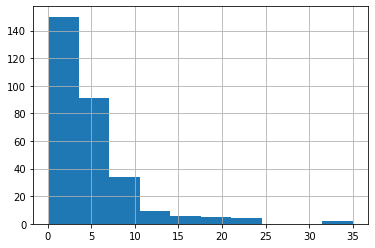

In [18]:
df['Selling_Price'].hist(bins=10)



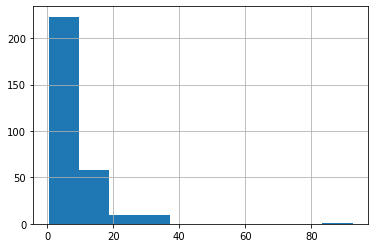

In [19]:
df['Present_Price'].hist(bins=10)

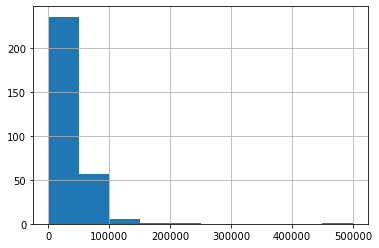

In [20]:
df['Kms_Driven'].hist(bins=10)

### Checking for How much old is the car   

In [21]:
df['Old']=df['Year'].apply(lambda x:2020-x)

## Droping Car_Name and Year column

In [22]:
df.drop(columns=['Car_Name','Year'],axis=1,inplace=True)

### One Hot Encoding

In [23]:
df=pd.get_dummies(data=df,drop_first=True)  ##One Hot encoding 

In [24]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


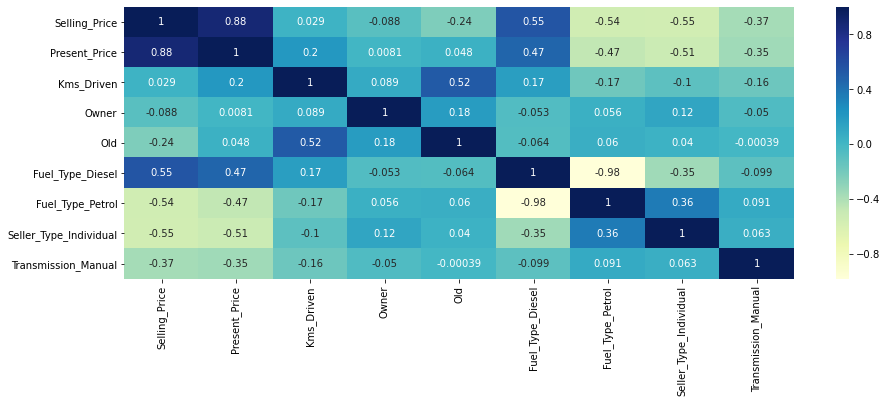

In [25]:
## Checking for Correlation
plt.figure(figsize=(15,5))
corr=df.corr()
sns.heatmap(corr,xticklabels=True,yticklabels=True,cmap='YlGnBu',annot=True)

## Prepartion For Data Splitting

In [30]:
X=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']
## importing train test split and other features
from sklearn.model_selection import ShuffleSplit,RandomizedSearchCV,train_test_split,GridSearchCV
cv=ShuffleSplit(n_splits=10,test_size=0.2,train_size=0.8)## Used in randomizesearchCV and in GridsearchCV For Cross Validattion

In [31]:
# Importing various model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## Model Selection with the help of RandomizeSearchCV

In [32]:
model_parm={
'linear_regression':{
            'model':LinearRegression(),
             'parm_grid':{                 
                 'fit_intercept':[True,False],
                'normalize':[True]
             }
      },
'random_forest':{
            'model':RandomForestRegressor(),
             'parm_grid':{                 
                
                'n_estimators':[int(x) for x in np.linspace(100,1200,12)],
                 'criterion':['mae','mse'],
                 'max_depth':[int(x) for x in np.linspace(60,1200,10)],
                 'max_features':['auto','sqrt','log2'],
                 'max_leaf_nodes':[2,10,20],
                 'min_samples_leaf':[1,2,5]
                 
             }
      },
'Decision_tree':{
            'model':DecisionTreeRegressor(),
             'parm_grid':{                 
                
                
                 'criterion':['mae','mse'],
                 'max_leaf_nodes':[2,10,20],
                 
             }
      }
}

In [34]:
score=[]
for model_name,mp in model_parm.items():
    clf=RandomizedSearchCV(mp['model'],mp['parm_grid'],cv=cv,n_iter=4,verbose=1,return_train_score=False,scoring='neg_mean_squared_error')
    clf.fit(X,y)
    score.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_parms':clf.best_params_,
        
        
     })

C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 2 is smaller than n_iter=4. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   48.7s finished


Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


In [35]:
res=pd.DataFrame(score)
res

,model,best_score,best_parms
0,linear_regression,-4.951894,"{'normalize': True, 'fit_intercept': True}"
1,random_forest,-4.615809,"{'n_estimators': 1000, 'min_samples_leaf': 1, ..."
2,Decision_tree,-2.527671,"{'max_leaf_nodes': 20, 'criterion': 'mae'}"


In [203]:
x=res['best_parms']
list(x)

[{'normalize': True, 'fit_intercept': True},
 {'n_estimators': 1200,
  'min_samples_leaf': 1,
  'max_leaf_nodes': 20,
  'max_features': 'auto',
  'max_depth': 946,
  'criterion': 'mae'},
 {'max_leaf_nodes': 20, 'criterion': 'mse'}]

In [ ]:
### Selecting Decision Tree Regressor from above

In [218]:
# Model Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Go for More parametres For Best model(model Exploration)

In [219]:
dt=DecisionTreeRegressor()
max_leaf_nodes=[int(x) for x in np.linspace(5,100,10)]
criterion=['mse','friedman_mse','mae']
splitter=['best','random']
max_depth=[int(x) for x in np.linspace(2,1200,10)]

param_grid={
    'max_leaf_nodes':max_leaf_nodes,
    'criterion':criterion,
    'splitter':splitter,
     'max_features':['auto','sqrt','log2'],
    'max_depth':max_depth
    
}

clf=RandomizedSearchCV(estimator =dt, param_distributions =param_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
clf.fit(X_train,y_train)

# dt=DecisionTreeRegressor(max_leaf_nodes=20,criterion='mse')
# dt.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] splitter=best, max_leaf_nodes=36, max_features=log2, max_depth=1066, criterion=friedman_mse 
[CV]  splitter=best, max_leaf_nodes=36, max_features=log2, max_depth=1066, criterion=friedman_mse, total=   0.0s
[CV] splitter=best, max_leaf_nodes=36, max_features=log2, max_depth=1066, criterion=friedman_mse 
[CV]  splitter=best, max_leaf_nodes=36, max_features=log2, max_depth=1066, criterion=friedman_mse, total=   0.0s
[CV] splitter=best, max_leaf_nodes=36, max_features=log2, max_depth=1066, criterion=friedman_mse 
[CV]  splitter=best, max_leaf_nodes=36, max_features=log2, max_depth=1066, criterion=friedman_mse, total=   0.0s
[CV] splitter=best, max_leaf_nodes=36, max_features=log2, max_depth=1066, criterion=friedman_mse 
[CV]  splitter=best, max_leaf_nodes=36, max_features=log2, max_depth=1066, criterion=friedman_mse, total=   0.0s
[CV] splitter=best, max_leaf_nodes=36, max_features=log2, max_depth=1066, criterion=friedman_ms

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  splitter=random, max_leaf_nodes=78, max_features=auto, max_depth=1066, criterion=friedman_mse, total=   0.0s
[CV] splitter=random, max_leaf_nodes=78, max_features=auto, max_depth=1066, criterion=friedman_mse 
[CV]  splitter=random, max_leaf_nodes=78, max_features=auto, max_depth=1066, criterion=friedman_mse, total=   0.0s
[CV] splitter=random, max_leaf_nodes=78, max_features=auto, max_depth=1066, criterion=friedman_mse 
[CV]  splitter=random, max_leaf_nodes=78, max_features=auto, max_depth=1066, criterion=friedman_mse, total=   0.0s
[CV] splitter=random, max_leaf_nodes=78, max_features=auto, max_depth=1066, criterion=friedman_mse 
[CV]  splitter=random, max_leaf_nodes=78, max_features=auto, max_depth=1066, criterion=friedman_mse, total=   0.0s
[CV] splitter=best, max_leaf_nodes=26, max_features=log2, max_depth=1066, criterion=mae 
[CV]  splitter=best, max_leaf_nodes=26, max_features=log2, max_depth=1066, criterion=mae, total=   0.0s
[CV] splitter=best, max_leaf_nodes=26, max_feat

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=10, n_job...
                   param_distri

In [220]:
clf.best_params_

{'splitter': 'random',
 'max_leaf_nodes': 78,
 'max_features': 'auto',
 'max_depth': 1066,
 'criterion': 'friedman_mse'}

In [221]:
clf.best_score_

-4.543376581247331

In [222]:
### Prediction
y_pred=clf.predict(X_test)

### Checking for error Distribution

count    61.000000
mean      0.292436
std       1.052079
min      -1.275000
25%      -0.093750
50%       0.094545
75%       0.350000
max       4.650000
Name: Selling_Price, dtype: float64

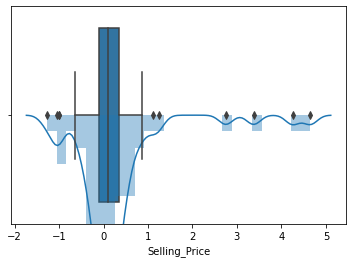

In [223]:
sns.distplot(y_test-y_pred)
sns.boxplot(y_test-y_pred)
r=y_test-y_pred
r.describe()

### Accuracy Check and error measurement

In [224]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,explained_variance_score,max_error
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
explained_variance=explained_variance_score(y_test,y_pred)
mr=max_error(y_test,y_pred)
print('Determination score(r2)',r2)
print('mean_absolute_error(mae)',mae)
print('mean_squared_error(mse)',mse)
print('root mean_squared_error(rmse)',np.sqrt(mse))
print('explained variance',explained_variance)
print('max error',mr)

Determination score(r2) 0.9522501704634795
mean_absolute_error(mae) 0.5666552231921084
mean_squared_error(mse) 1.1742430526344338
root mean_squared_error(rmse) 1.0836249593998994
explained variance 0.9557277349760732
max error 4.65


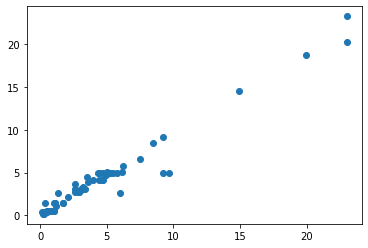

In [225]:
# sns.lineplot(y_test,y_pred)
plt.scatter(y_test,y_pred)

In [226]:
df.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1


## Sample Prediction

In [227]:
pred=[5.59,27000,0,6,0,0,0,1]
clf.predict([pred])

array([3.35])